In [13]:
### Upwind finite-difference scheme for the HJB equation
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
from sympy import symbols, solve
import math 
from numpy import linalg as LA
from decimal import Decimal, DecimalTuple 
from mpl_toolkits import mplot3d


In [14]:
################################## Space and time discretization
a , b = -1, 1 ### \Phi \in [a, b]
n = 55 ### Space discretization: Phi_i = a + i\Delta\Phi, i = 0, ..., n-1
m = 100 ### Time discretization: t_j = tf - j\Delta.t = 1-j\Delta.t, j = 0, ...., m-1  
 
Phi = np.zeros(n)
delta_Phi = (b-a)/(n-1)
Phi[0] = a
for i in range(1,n):
  Phi[i] = Phi[i-1] + delta_Phi
#print(Phi)

tf = 1
T = np.zeros(m)
delta_t = tf/(m-1)
for j in range(m):
 T[j] = tf- j*delta_t


In [15]:
# check that \Delta t is always less than \Delta\Phi
print('delta Phi = ', delta_Phi)
print('delta t =',delta_t)


delta Phi =  0.037037037037037035
delta t = 0.010101010101010102


In [16]:
############################################################### The value function and the optimal control 
gamma = delta_t/delta_Phi
#### The two initial conditions
V1 = np.zeros((n+1,m+1))
Z_ast = np.zeros((n+1,m+1))
f_ast = np.zeros((n+1,m+1))

for j in range(m): 
 for i in range(n): 
   V1[i,0]=abs(Phi[i]-1)**2
   Z_ast[i,0] = 0

   f_ast[i,j] = Phi[i] -Phi[i]**3 + Z_ast[i,j]
   V1[i,j+1] = Decimal((1+ abs(f_ast[i,j])*gamma)*V1[i,j] - 0.5*((1+np.sign(f_ast[i,j])))*gamma*f_ast[i,j]*V1[i+1,j] \
               + 0.5*( (1-np.sign(f_ast[i,j])) )*gamma*f_ast[i,j]*V1[i-1,j]-0.5*delta_t*Z_ast[i,j]**2) 
   if (Phi[i]-Phi[i]**3 -(V1[i,j+1]-V1[i-1,j+1])/delta_Phi >=0): 
    Z_ast[i,j] = -(V1[i,j+1]-V1[i-1,j+1])/delta_Phi
   else:
    Z_ast[i,j] = -(V1[i+1,j+1]-V1[i,j+1])/delta_Phi


V = np.zeros((n,m))
V = V1[0:n,0:m]
################## Plot of the value function
#fig = plt.figure()
#ax = plt.axes(projection='3d')
#for j in range(m):
 #for i in range(n): 
  # ax.scatter(Phi[i],T[j], V[i,j],  c='b' , marker='o')

#for label in (ax.get_xticklabels() + ax.get_yticklabels()):
#	label.set_fontsize(10)
#ax.set_xlabel('Φ', fontsize=30)
#ax.set_ylabel('Time', fontsize=15)
#ax.set_zlabel('V(t,Φ)',fontsize=20)
#ax.set_title('The value function V(t,Φ)')
#ax.ticklabel_format(style='sci',scilimits=(-3,4),axis='both')
#ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0), fontsize = 5)
#ax.ticklabel_format(axis='y',style='sci',scilimits=(1,4))

plt.show()


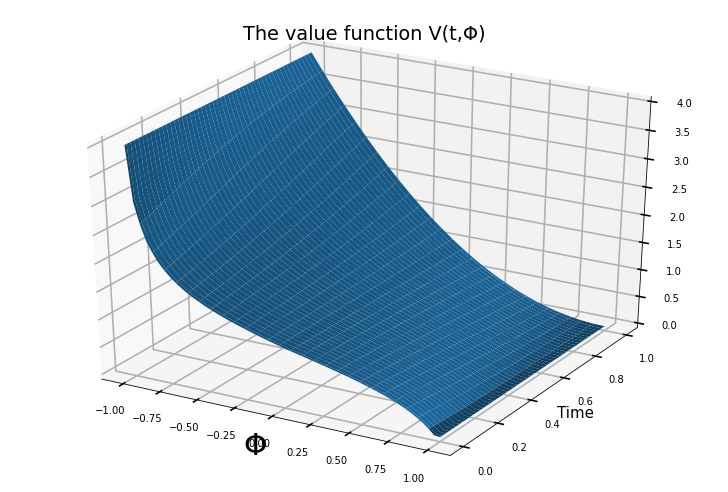

In [17]:

fig = plt.figure()
ax = plt.axes(projection ='3d')

X, Y = np.meshgrid(Phi, T)

# ax.contour3D is used plot a contour graph
ax = plt.axes(projection ='3d')
ax.plot_surface(X,Y, np.transpose(V))
for label in (ax.get_xticklabels() + ax.get_yticklabels() + ax.get_zticklabels()):
	label.set_fontsize(10)
ax.set_xlabel('Φ', fontsize=30)
ax.set_ylabel('Time', fontsize=15)
#ax.set_zlabel('V(t,Φ)',fontsize=20)
ax.set_title('The value function V(t,Φ)')
plt.show()

In [18]:
### Plot of the optimal control              
#fig = plt.figure()
#ax = plt.axes(projection='3d')

# Setting X-axis and Y-axis limits

#for j in range(m):
 # for i in range(n):
  #  if (Phi[i]-Phi[i]**3 -(V1[i,j]-V1[i-1,j])/delta_Phi >=0): 
   #  ax.scatter(Phi[i], T[j], -(V1[i,j]-V1[i-1,j])/delta_Phi, c='b', marker='o')
    #else:
     #ax.scatter(Phi[i], T[j], -(V1[i+1,j]-V1[i,j])/delta_Phi, c='b', marker='o')

#ax.set_xlabel('Phi', fontsize=5)
#ax.set_ylabel('Time', fontsize=5)
#ax.set_zlabel('Z*(t,Φ)', fontsize=5)
#ax.set_title('The optimal control Z*(t,Φ)')
#plt.show()  


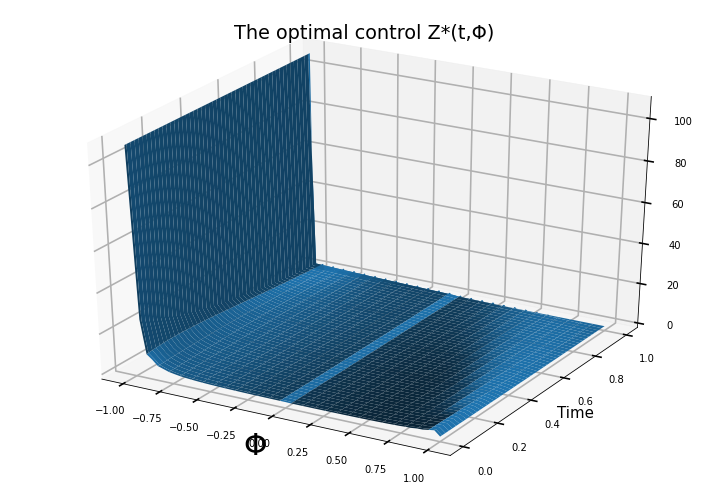

In [19]:
Z_optimal = Z_ast[0:n,0:m]
fig = plt.figure()
ax = plt.axes(projection ='3d')
# Setting X-axis and Y-axis limits
X, Y = np.meshgrid(Phi, T)

# ax.contour3D is used plot a contour graph
ax = plt.axes(projection ='3d')
ax.plot_surface(X,Y,np.transpose(Z_optimal))
for label in (ax.get_xticklabels() + ax.get_yticklabels()+ax.get_zticklabels()):
	label.set_fontsize(10)
ax.set_xlabel('Φ', fontsize=30)
ax.set_ylabel('Time', fontsize=15)
#ax.set_zlabel('V(t,Φ)',fontsize=20)
ax.set_title('The optimal control Z*(t,Φ)')
plt.show()

error =  3.83219


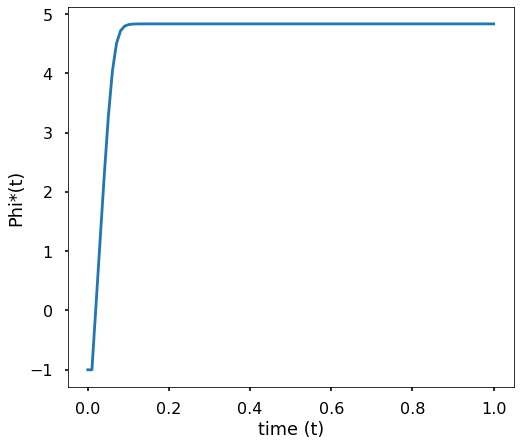

error =  2.0167


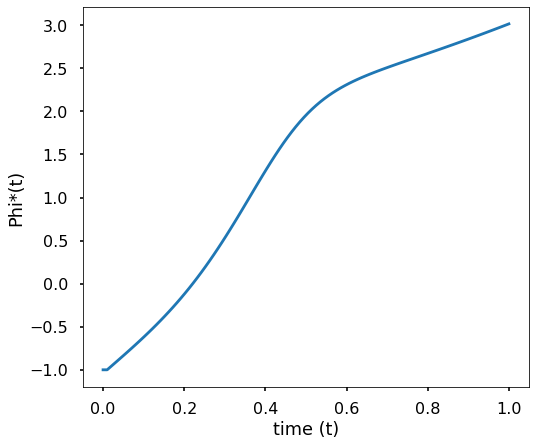

error =  1.31969


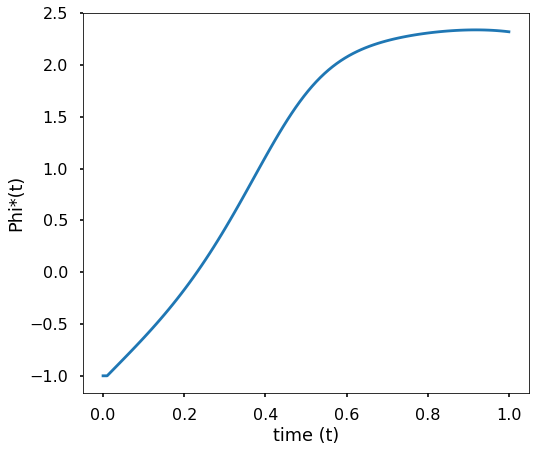

error =  1.12002


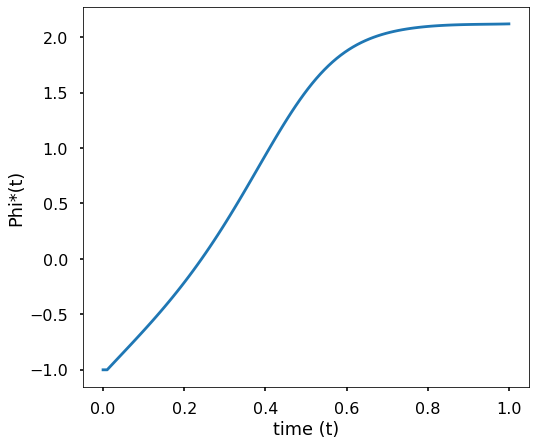

error =  0.93039


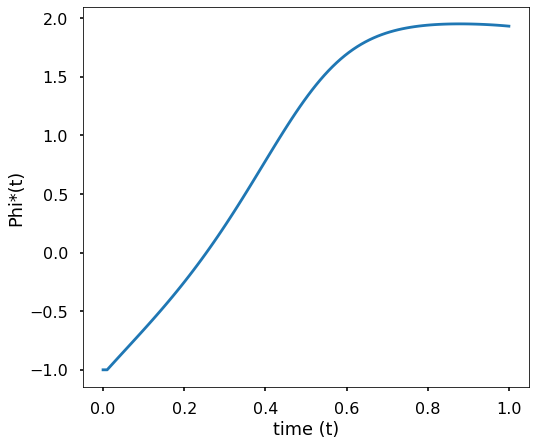

error =  0.81678


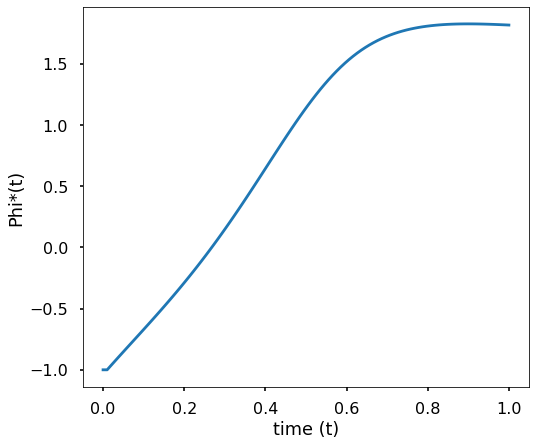

error =  0.71653


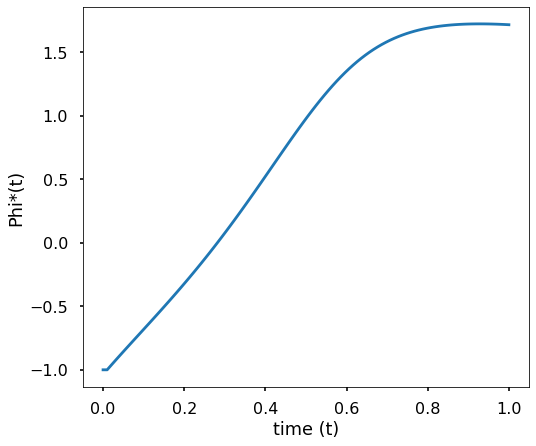

error =  0.63506


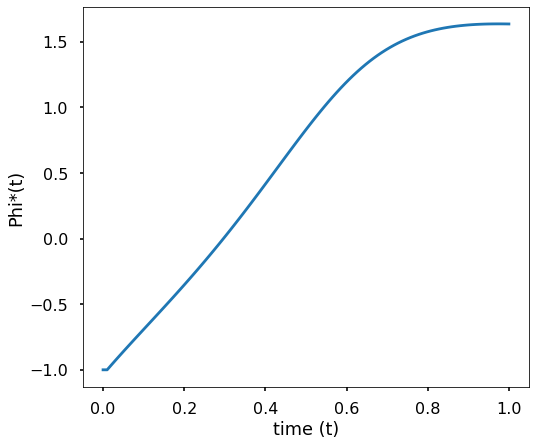

error =  0.5586


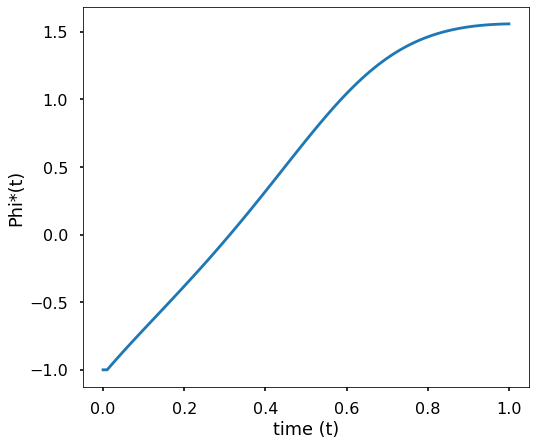

error =  0.48469


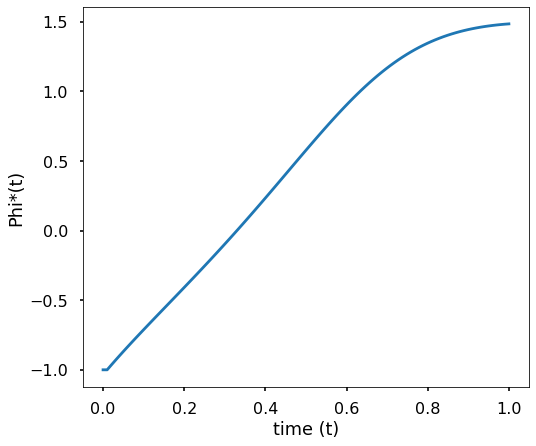

error =  0.40891


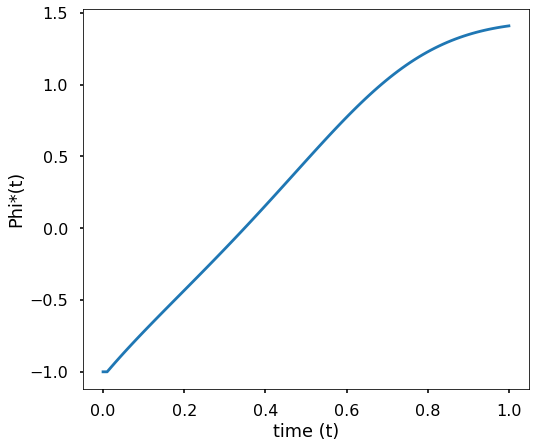

error =  0.32917


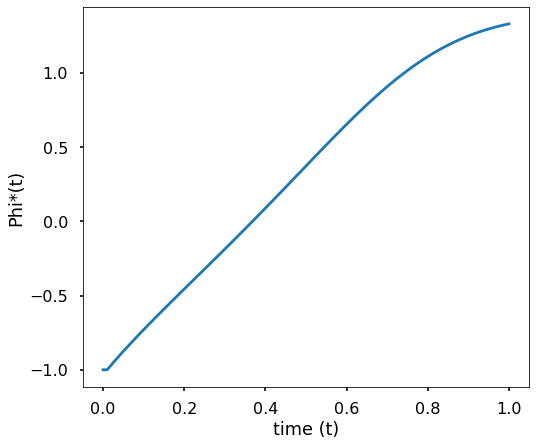

error =  0.244


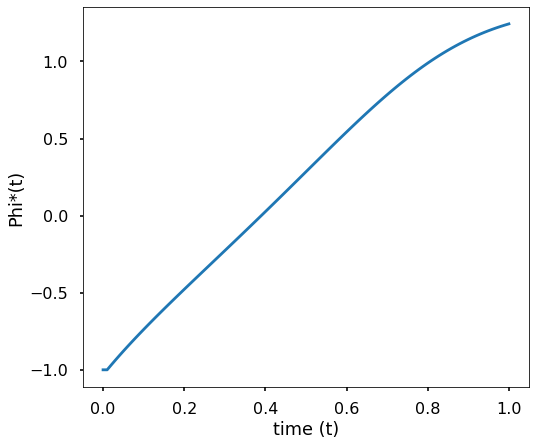

error =  0.15307


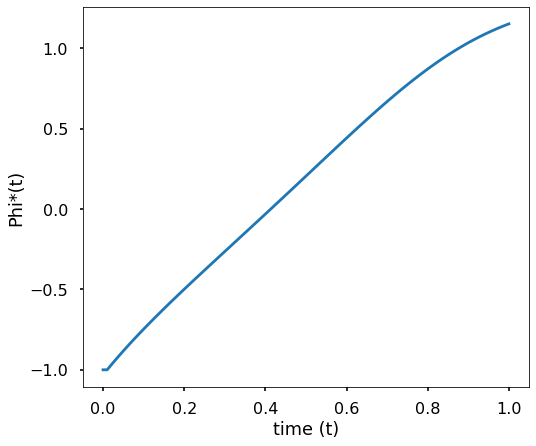

error =  0.05697


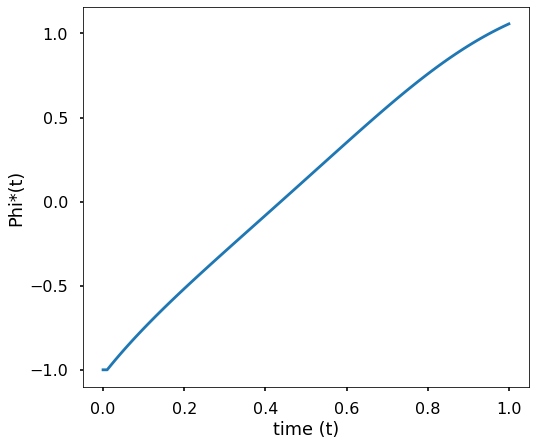

error =  0.04296


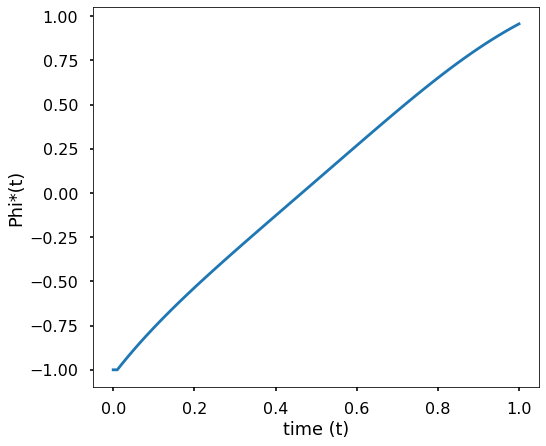

error =  0.14483


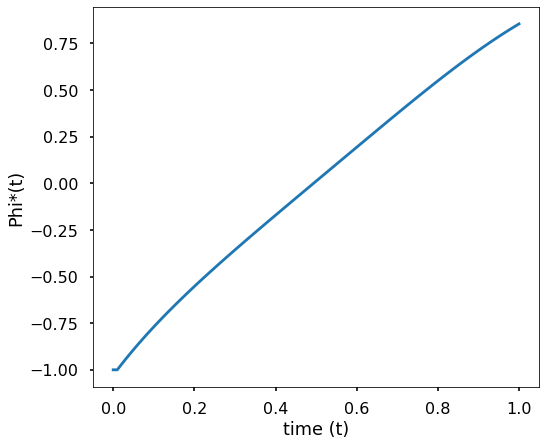

error =  0.24659


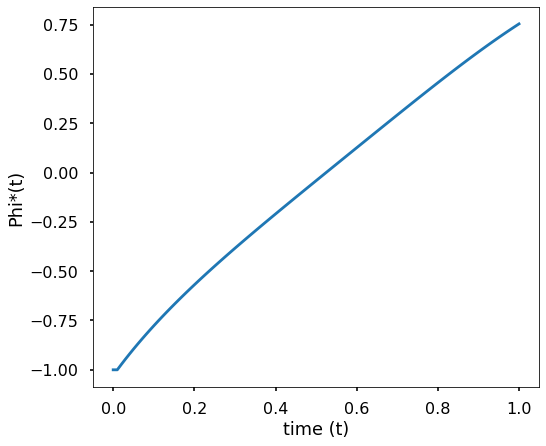

error =  0.34624


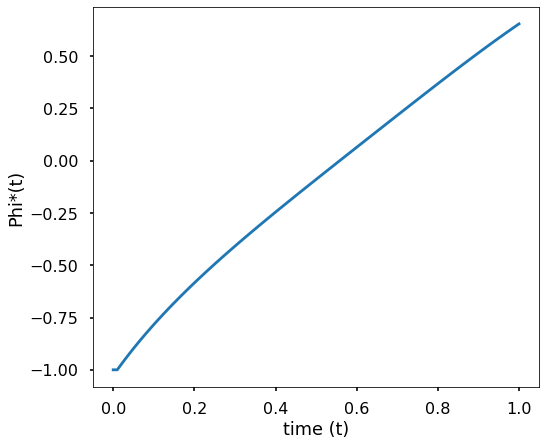

error =  0.4421


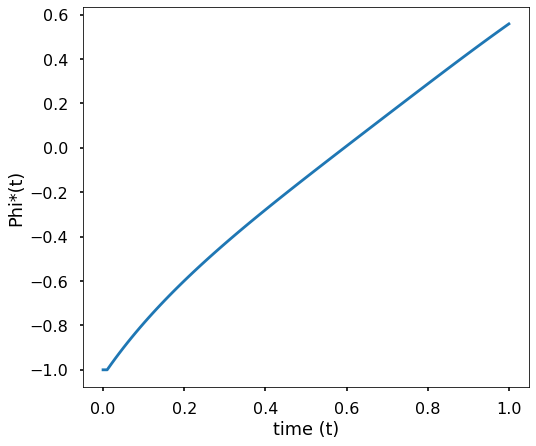

error =  0.5329


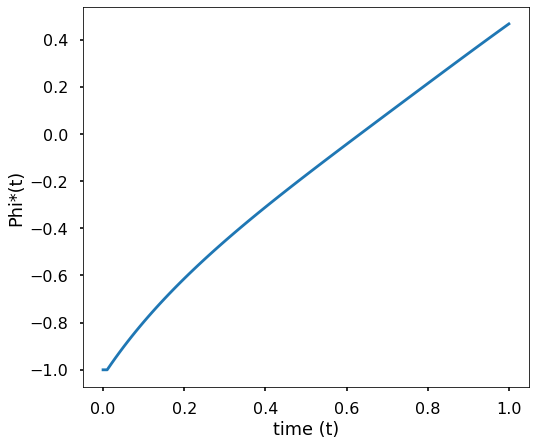

error =  0.6178


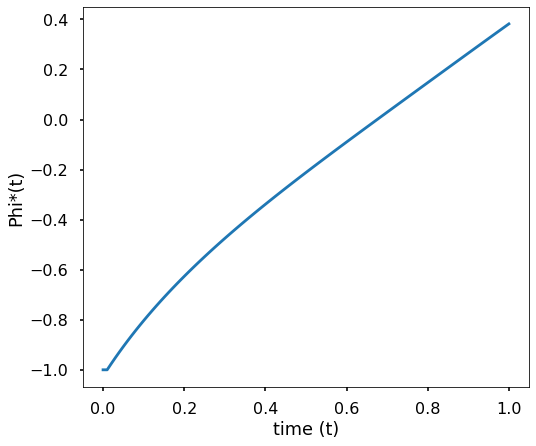

error =  0.69637


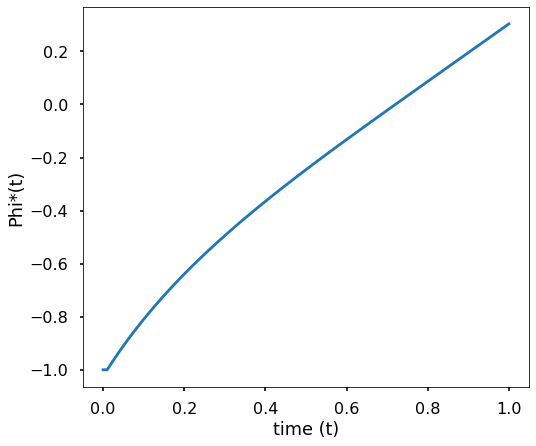

error =  0.76847


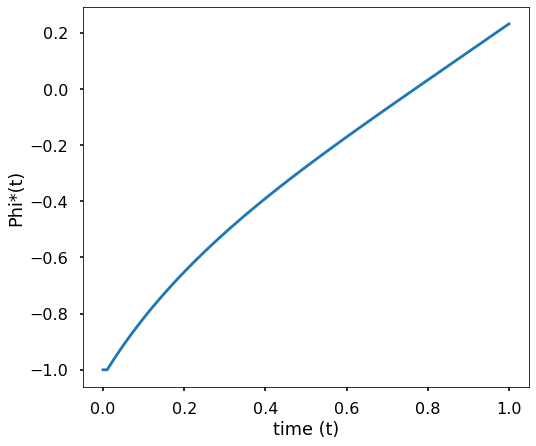

error =  0.83422


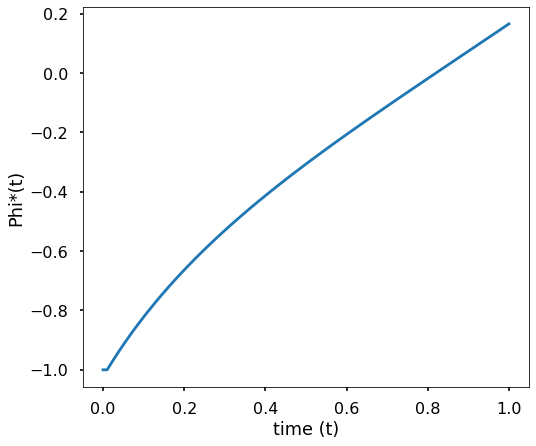

error =  0.89388


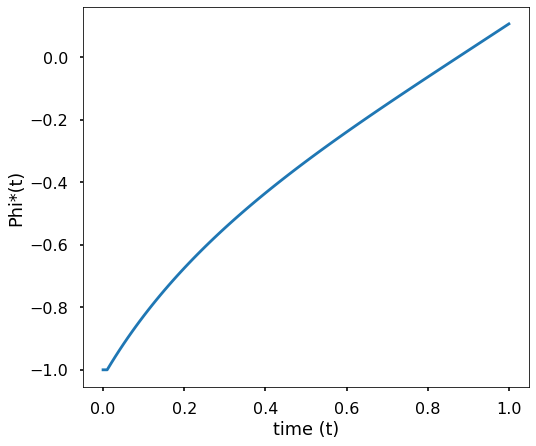

error =  0.94781


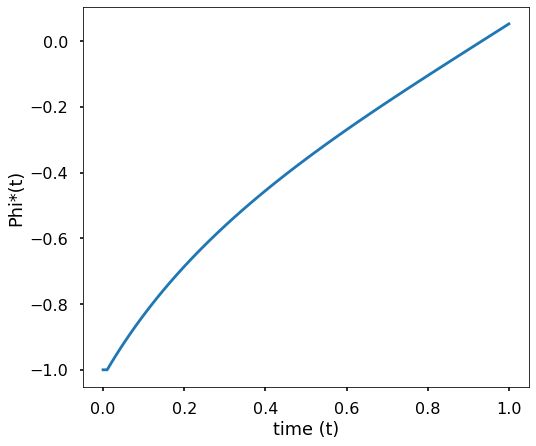

error =  0.99642


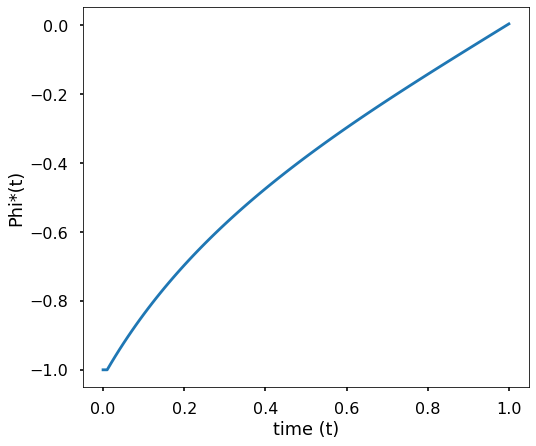

error =  1.22621


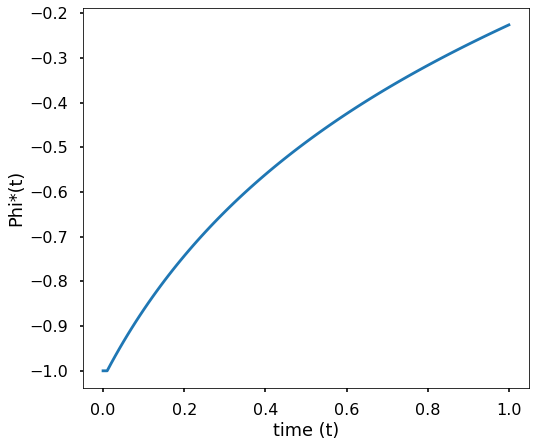

error =  1.24199


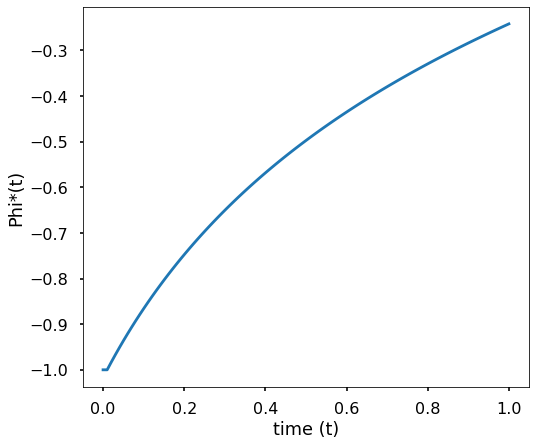

error =  1.25507


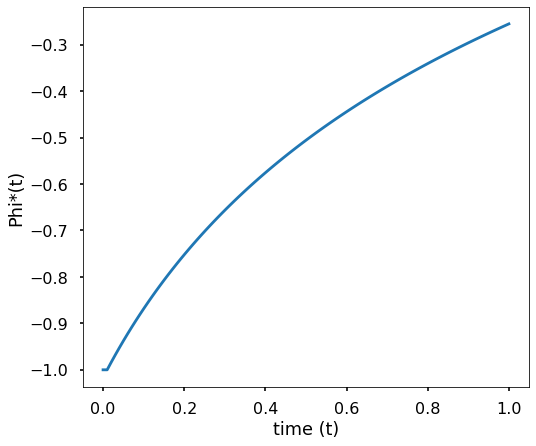

error =  1.26575


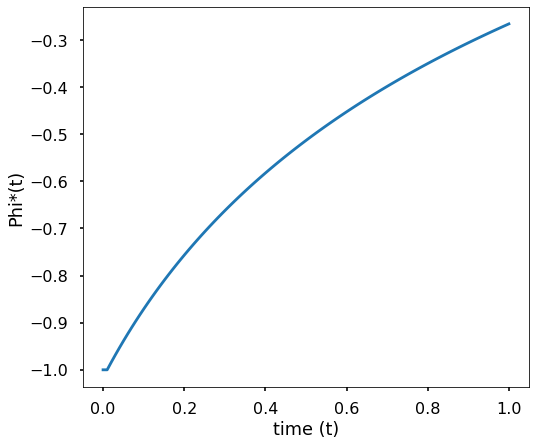

error =  1.27429


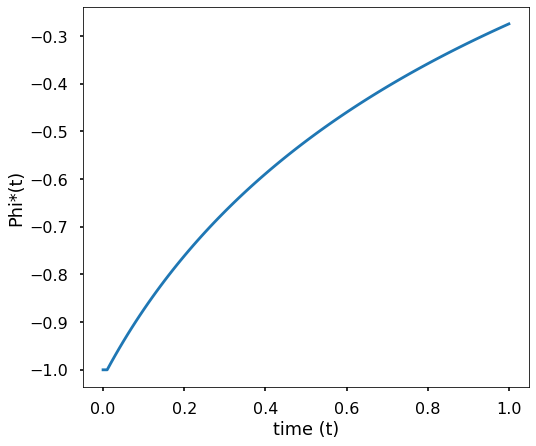

error =  1.28091


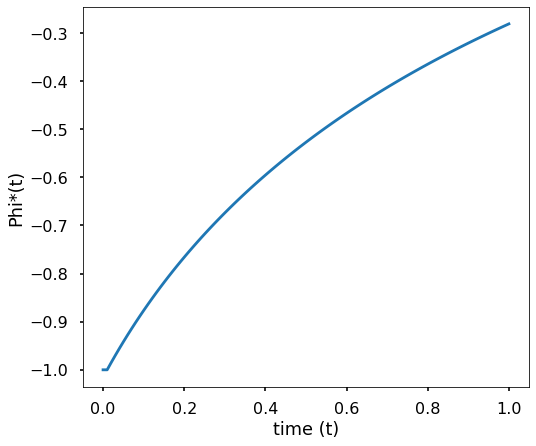

error =  1.28576


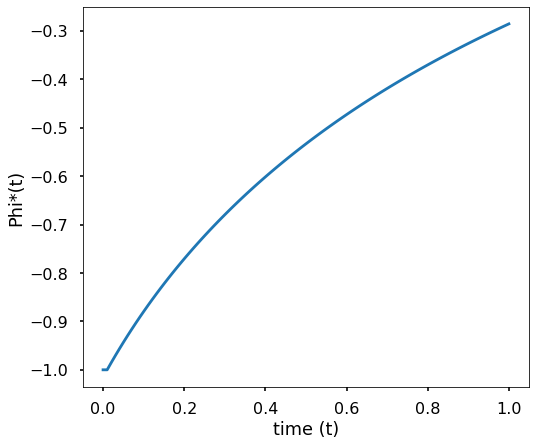

error =  1.289


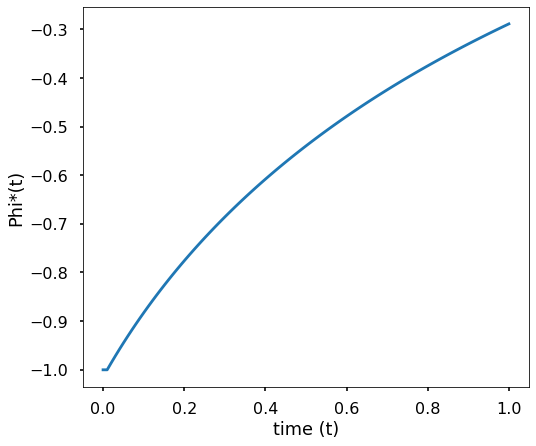

error =  1.29072


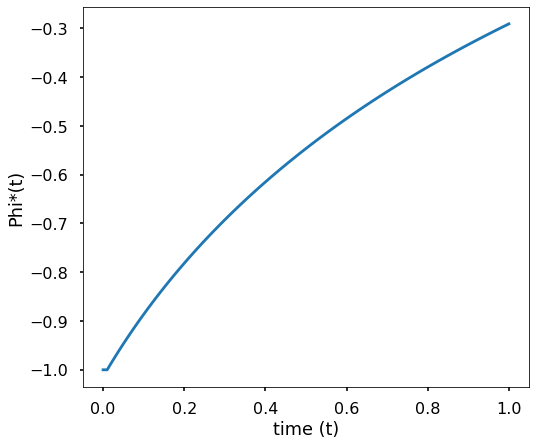

error =  1.29102


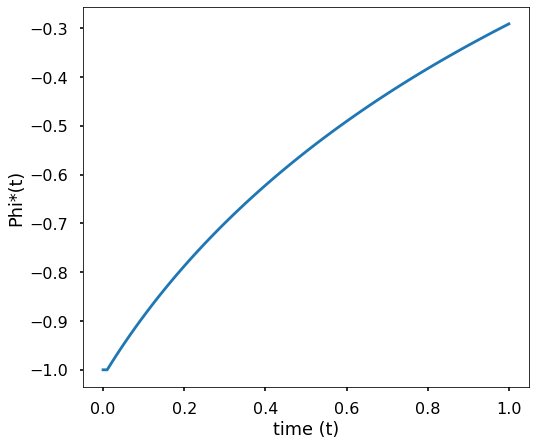

error =  1.28995


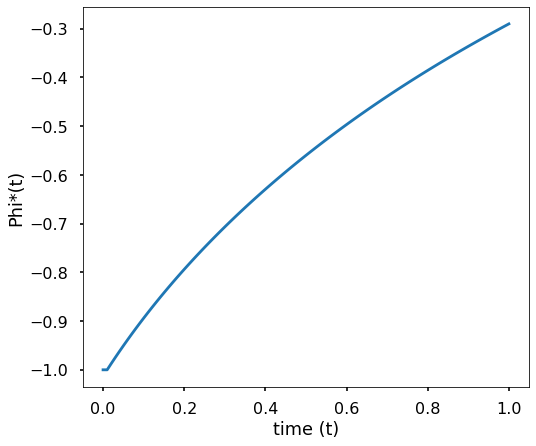

error =  1.28757


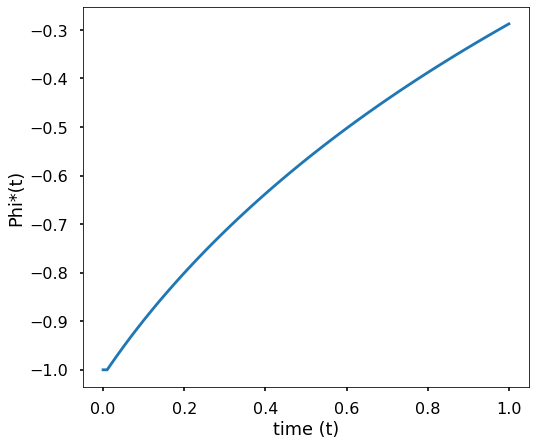

error =  1.28391


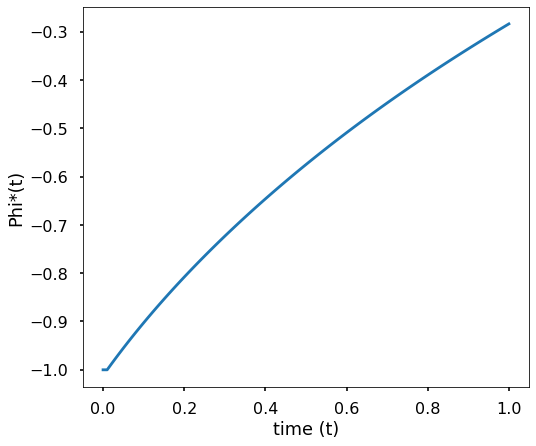

error =  1.27898


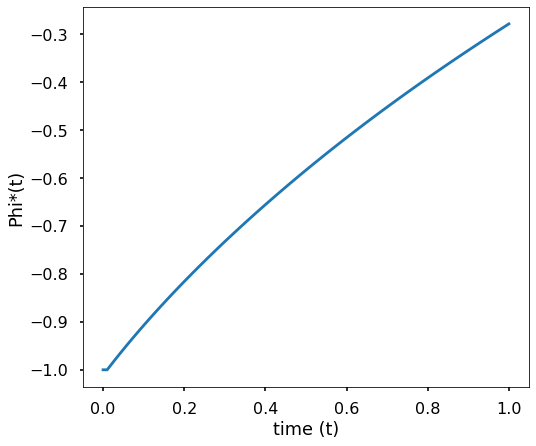

error =  1.27279


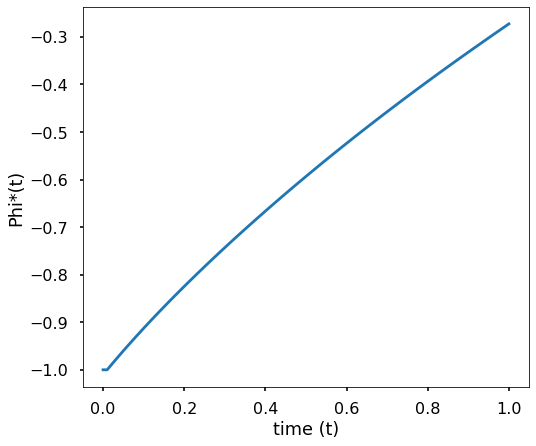

error =  1.2654


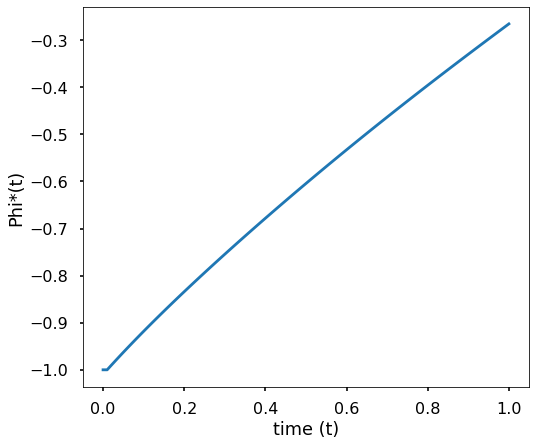

error =  1.25679


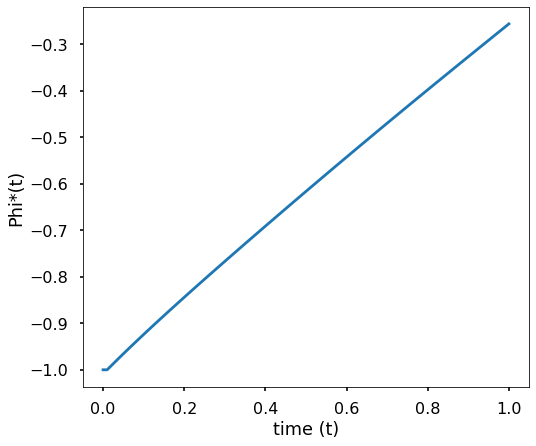

error =  1.24725


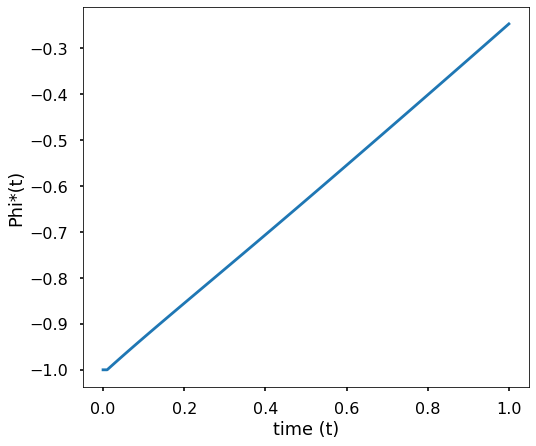

error =  1.23647


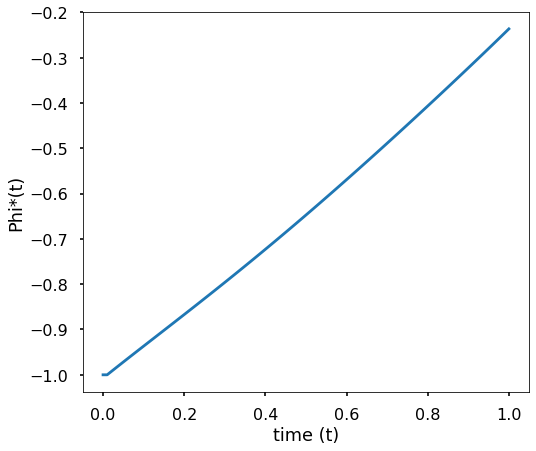

error =  1.22641


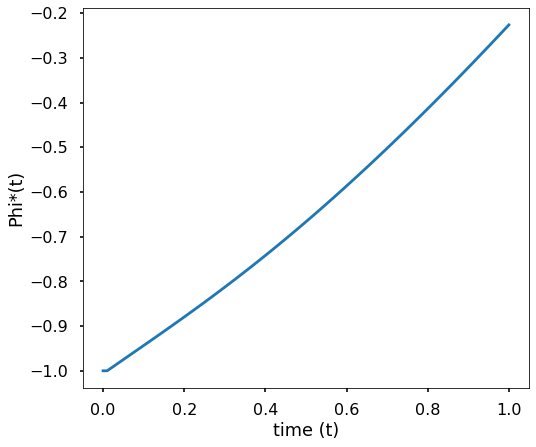

error =  1.21426


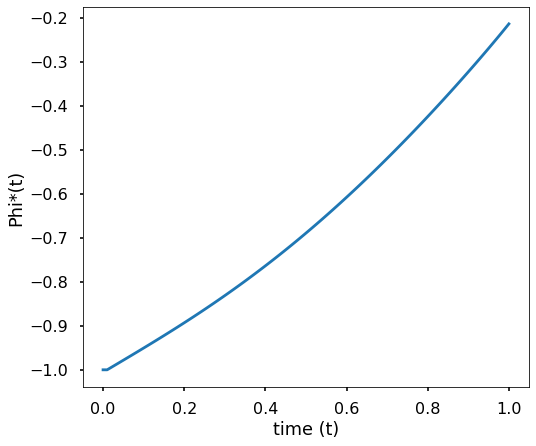

error =  1.21026


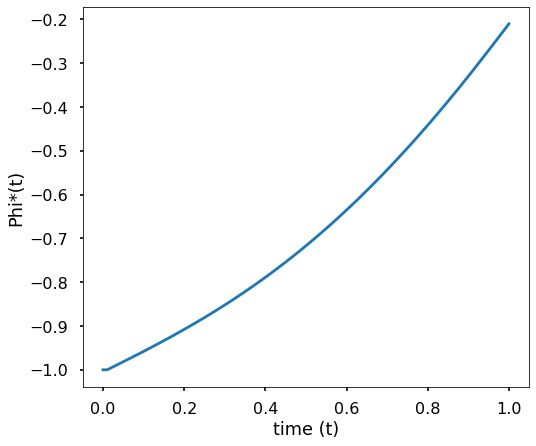

error =  1.20086


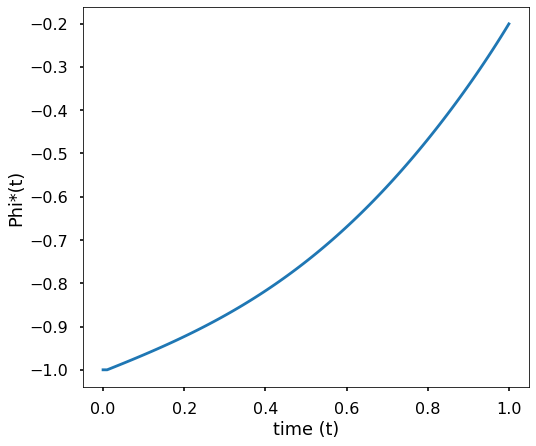

error =  1.2265


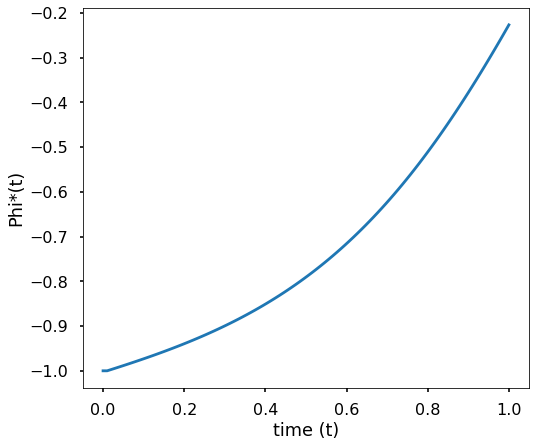

error =  1.25339


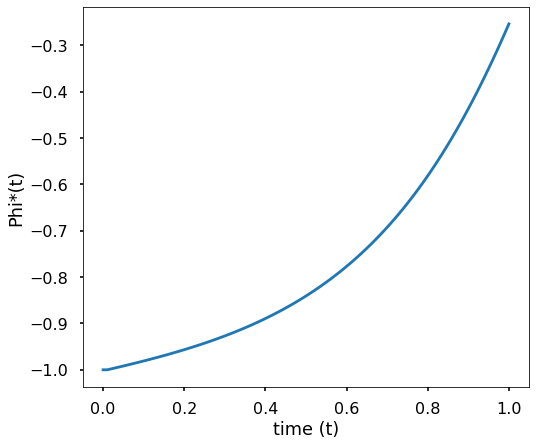

error =  1.40023


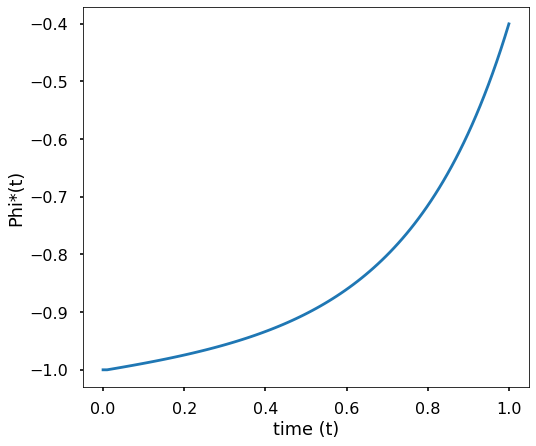

error =  1.93635


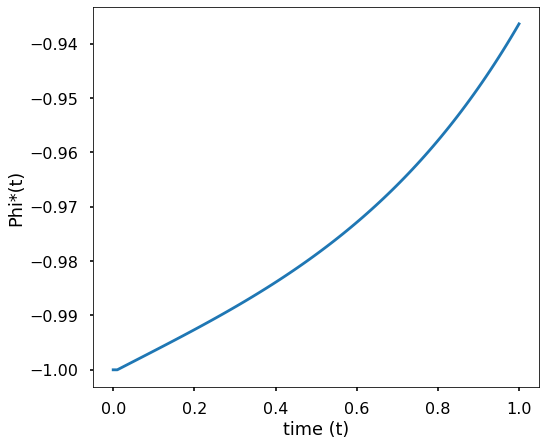

In [25]:
error = np.zeros(n)

for i in range(n):
 Phi_ast =np.zeros(m)
 Phi_ast[0] = -1
 for j in range(1,m):
  Phi_ast[j] = Phi_ast[j-1] + (Phi_ast[j-1] - Phi_ast[j-1]**3)*delta_t + Z_optimal[i,j-1]*delta_t
  #index = np.argmin(abs(Phi_ast[j]-Phi))
  #index +=1 
 error[i] = np.round(abs(Phi_ast[m-1]-1),5)  ### 5 digits
 print('error = ', error[i]) 
 plt.figure(figsize=(8,7))
 plt.plot(T[::-1], Phi_ast,label='Phi(t)')
 plt.xlabel('time (t)')
 plt.ylabel('Phi*(t)')
 plt.show()
#print('The graph of the optimal pathway is given for the index i = ', np.argmin(error)) 


In [26]:
print(Phi_ast[m-1]-1)
print(Phi_ast[1])

-1.9363488773829918
-1.0


In [27]:





###### checking that \Phi is antisymmetric
### m = 55 and n = 100
Phi_at_t = [-1.,         -0.94613408 ,-0.89285482, -0.84017577, -0.78810939 ,-0.73666713,
 -0.68585935, -0.6356954,  -0.58618365, -0.53733142, -0.48914512, -0.44163017,
 -0.39479109, -0.34863152, -0.30315422, -0.25836115, -0.21425343, -0.17083146,
 -0.1280949,  -0.08604269, -0.04467314, -0.00398393,  0.03602785,  0.07536569,
  0.11403356,  0.15203595,  0.1893778,   0.22606445,  0.26210165,  0.29749551,
  0.33225248,  0.36637927,  0.39988292,  0.43277068,  0.46505004,  0.49672869,
  0.52781451,  0.55831553,  0.58823994,  0.61759607,  0.6463924,   0.67463757,
  0.70234039,  0.72950996,  0.75615569,  0.78228756,  0.8079163,   0.83305393,
  0.85771431,  0.88191425,  0.90567503,  0.92902479, 0.95200208,  0.97466116,
  0.99707993]

### m=55 and n =100
Phi_ast_at_negative_t= [-1.,         -0.94613408, -0.89285482, -0.84017577, -0.78810939, -0.73666713,
 -0.68585935, -0.6356954,  -0.58618365, -0.53733142, -0.48914512, -0.44163017,
 -0.39479109, -0.34863152, -0.30315422, -0.25836115, -0.21425343, -0.17083146,
 -0.1280949,  -0.08604269, -0.04467314, -0.00398393,  0.03602785,  0.07536569,
  0.11403356,  0.15203595,  0.1893778,   0.22606445,  0.26210165,  0.29749551,
  0.33225248,  0.36637927,  0.39988292,  0.43277068,  0.46505004,  0.49672869,
  0.52781451,  0.55831553,  0.58823994, 0.61759607,  0.6463924,   0.67463757,
  0.70234039,  0.72950996,  0.75615569,  0.78228756,  0.8079163,   0.83305393,
  0.85771431,  0.88191425,  0.90567503,  0.92902479,  0.95200208,  0.97466116,
  0.99707993]